In [ ]:
# dataset link: https://huggingface.co/datasets/ccdv/pubmed-summarization

In [2]:
!pip install datasets

"""
DATASET STEP: Cleaning and storing splits (train, validation, and test)
"""
from datasets import load_dataset

# Load the test split from Hugging Face
dataset = load_dataset("ccdv/pubmed-summarization")

# ✅ Function to clean and load into a list of (article, abstract) tuples
def clean_pubmed_dataset(dataset, limit=None):
    data = []
    for i, row in enumerate(dataset):
        if row['article'] and row['abstract']:
            article = row['article'].strip().replace('\n', ' ')
            abstract = row['abstract'].strip().replace('\n', ' ')
            data.append((article, abstract))
        if limit and len(data) >= limit:
            break
    return data

# ✅ Load and clean each split
train_data = clean_pubmed_dataset(dataset['train'], limit=None)
val_data = clean_pubmed_dataset(dataset['validation'], limit=None)
test_data = clean_pubmed_dataset(dataset['test'], limit=None)

# ✅ Combine all if needed
pubmed_data = train_data + val_data + test_data

# ✅ Confirm
print(f"Train Samples: {len(train_data)}")
print(f"Validation Samples: {len(val_data)}")
print(f"Test Samples: {len(test_data)}")
print(f"Total Combined Samples: {len(pubmed_data)}")

# ✅ Preview a sample
print("\nSample Article (input):")
print(pubmed_data[0][0][:500])

print("\nSample Abstract (target):")
print(pubmed_data[0][1][:300])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.80k [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/210M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/208M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/207M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/211M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/210M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/59.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/58.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/119924 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6633 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6658 [00:00<?, ? examples/s]

Train Samples: 117232
Validation Samples: 6633
Test Samples: 6658
Total Combined Samples: 130523

Sample Article (input):
a recent systematic analysis showed that in 2011 , 314 ( 296 - 331 ) million children younger than 5 years were mildly , moderately or severely stunted and 258 ( 240 - 274 ) million were mildly , moderately or severely underweight in the developing countries .   in iran a study among 752 high school girls in sistan and baluchestan showed prevalence of 16.2% , 8.6% and 1.5% , for underweight , overweight and obesity , respectively .   the prevalence of malnutrition among elementary school aged ch

Sample Abstract (target):
background : the present study was carried out to assess the effects of community nutrition intervention based on advocacy approach on malnutrition status among school - aged children in shiraz , iran.materials and methods : this case - control nutritional intervention has been done between 2008 and


In [3]:
 #from google.colab import drive
#drive.mount('/content/drive')

In [4]:

"""
TOKENIZER STEP
"""
from transformers import T5Tokenizer

# Load tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Set max lengths
MAX_INPUT_LEN = 512
MAX_TARGET_LEN = 128

# Function to tokenize
def tokenize_pubmed_data(pairs, tokenizer, max_input_len=512, max_target_len=128):
    inputs = [x[0] for x in pairs]
    targets = [x[1] for x in pairs]

    model_inputs = tokenizer(
        inputs,
        max_length=max_input_len,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )

    labels = tokenizer(
        targets,
        max_length=max_target_len,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs
print("Tokenizer pad token ID:", tokenizer.pad_token_id)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Tokenizer pad token ID: 0


In [5]:
import torch
from torch.utils.data import Dataset

class PubMedSummaryDecoderDataset(Dataset):
    def __init__(self, input_pairs, tokenizer, max_input_len=512, max_target_len=128):
        self.tokenizer = tokenizer
        self.max_input_len = max_input_len
        self.max_target_len = max_target_len
        self.data = input_pairs

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        article, abstract = self.data[idx]

        # Tokenize input article
        input_enc = self.tokenizer(
            article,
            max_length=self.max_input_len,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        # Tokenize target abstract
        target_enc = self.tokenizer(
            abstract,
            max_length=self.max_target_len,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        input_ids = input_enc["input_ids"].squeeze(0)
        attention_mask = input_enc["attention_mask"].squeeze(0)
        labels = target_enc["input_ids"].squeeze(0)

        # Optional: mask PADs from loss
        labels[labels == self.tokenizer.pad_token_id] = -100

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }



In [6]:
train_dataset = PubMedSummaryDecoderDataset(pubmed_data, tokenizer)

# Preview one entry
sample = train_dataset[0]
print("Input IDs shape:", sample["input_ids"].shape)
print("Labels shape:", sample["labels"].shape)

Input IDs shape: torch.Size([512])
Labels shape: torch.Size([128])


In [7]:
"""
DATALOADER STEP
"""
from torch.utils.data import DataLoader

# ✅ Collate function to batch and stack tensors
def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_masks = [item['attention_mask'] for item in batch]
    labels = [item['labels'] for item in batch]

    input_ids = torch.stack(input_ids)
    attention_masks = torch.stack(attention_masks)
    labels = torch.stack(labels)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_masks,
        'labels': labels
    }

# ✅ Create the DataLoader
BATCH_SIZE = 8

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=collate_fn
)

# ✅ Preview a batch
batch = next(iter(train_loader))
print("Batch input_ids shape:", batch["input_ids"].shape)
print("Batch labels shape:", batch["labels"].shape)

Batch input_ids shape: torch.Size([8, 512])
Batch labels shape: torch.Size([8, 128])


In [8]:
import torch.nn as nn
import torch.nn.functional as F

# Hyperparameters
VOCAB_SIZE = tokenizer.vocab_size
EMBED_DIM = 512
NUM_HEADS = 8
NUM_LAYERS = 6
FF_DIM = 2048
DROPOUT = 0.1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Positional encoding
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=512):
        super().__init__()
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2) * (-torch.log(torch.tensor(10000.0)) / embed_dim))
        pe = torch.zeros(max_len, embed_dim)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)].to(x.device)

# Token embedding
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)

    def forward(self, x):
        return self.embedding(x)

# Decoder block
class DecoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, attn_mask=None):
        attn_output, _ = self.attn(x, x, x, attn_mask=attn_mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

# Full decoder model
class GPTDecoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, ff_dim, num_layers, dropout, max_len):
        super().__init__()
        self.token_embed = TokenEmbedding(vocab_size, embed_dim)
        self.pos_embed = PositionalEncoding(embed_dim, max_len)
        self.layers = nn.ModuleList([
            DecoderBlock(embed_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.ln_f = nn.LayerNorm(embed_dim)
        self.output_head = nn.Linear(embed_dim, vocab_size)

    def forward(self, input_ids):
      x = self.token_embed(input_ids)
      x = self.pos_embed(x)

      batch_size, seq_len = x.size(0), x.size(1)

      # Create 2D causal mask
      causal_mask = torch.tril(torch.ones(seq_len, seq_len)).to(x.device)
      causal_mask = causal_mask.masked_fill(causal_mask == 0, float('-inf')).masked_fill(causal_mask == 1, 0.0)

      # Expand to 3D for multi-head attention: (batch_size * num_heads, seq_len, seq_len)
      causal_mask = causal_mask.unsqueeze(0).expand(batch_size * NUM_HEADS, -1, -1)

      for layer in self.layers:
          x = layer(x, attn_mask=causal_mask)

      x = self.ln_f(x)
      logits = self.output_head(x)
      return logits


In [9]:
model = GPTDecoder(
    vocab_size=VOCAB_SIZE,
    embed_dim=EMBED_DIM,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    num_layers=NUM_LAYERS,
    dropout=DROPOUT,
    max_len=MAX_INPUT_LEN
).to(DEVICE)


In [10]:
sample_input = batch["input_ids"].to(DEVICE)
sample_logits = model(sample_input)
print("Logits shape:", sample_logits.shape)  # (batch_size, seq_len, vocab_size)


Logits shape: torch.Size([8, 512, 32000])


In [11]:
"""
TRAINING LOOP
"""
import time
from torch.nn.utils import clip_grad_norm_

# ✅ Loss function and optimizer
loss_fn = nn.CrossEntropyLoss(ignore_index=-100)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# ✅ Training settings
EPOCHS = 3
GRAD_CLIP = 1.0  # helps with stability

model.train()

for epoch in range(EPOCHS):
    total_loss = 0
    start_time = time.time()

    for step, batch in enumerate(train_loader):
        input_ids = batch['input_ids'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        # Forward
        logits = model(input_ids)
        logits = logits[:, :labels.size(1), :]  # trim logits to label length
        loss = loss_fn(logits.reshape(-1, logits.size(-1)), labels.view(-1))


        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optional: gradient clipping
        clip_grad_norm_(model.parameters(), GRAD_CLIP)

        optimizer.step()

        total_loss += loss.item()

        # Print every 100 steps
        if step % 100 == 0 and step != 0:
            avg_loss = total_loss / step
            print(f"Epoch [{epoch+1}/{EPOCHS}] Step [{step}] - Avg Loss: {avg_loss:.4f}")

    epoch_loss = total_loss / len(train_loader)
    print(f"✅ Epoch {epoch+1} complete! Avg Loss: {epoch_loss:.4f} | Time: {time.time() - start_time:.2f}s")

    # Save checkpoint
    torch.save(model.state_dict(), f"gpt_decoder_epoch{epoch+1}.pt")



Epoch [1/3] Step [100] - Avg Loss: 7.8398
Epoch [1/3] Step [200] - Avg Loss: 7.1634
Epoch [1/3] Step [300] - Avg Loss: 6.8822
Epoch [1/3] Step [400] - Avg Loss: 6.7330
Epoch [1/3] Step [500] - Avg Loss: 6.6445
Epoch [1/3] Step [600] - Avg Loss: 6.5790
Epoch [1/3] Step [700] - Avg Loss: 6.5309
Epoch [1/3] Step [800] - Avg Loss: 6.4966
Epoch [1/3] Step [900] - Avg Loss: 6.4699
Epoch [1/3] Step [1000] - Avg Loss: 6.4453
Epoch [1/3] Step [1100] - Avg Loss: 6.4277
Epoch [1/3] Step [1200] - Avg Loss: 6.4106
Epoch [1/3] Step [1300] - Avg Loss: 6.3947
Epoch [1/3] Step [1400] - Avg Loss: 6.3829
Epoch [1/3] Step [1500] - Avg Loss: 6.3708
Epoch [1/3] Step [1600] - Avg Loss: 6.3615
Epoch [1/3] Step [1700] - Avg Loss: 6.3512
Epoch [1/3] Step [1800] - Avg Loss: 6.3444
Epoch [1/3] Step [1900] - Avg Loss: 6.3376
Epoch [1/3] Step [2000] - Avg Loss: 6.3313
Epoch [1/3] Step [2100] - Avg Loss: 6.3246
Epoch [1/3] Step [2200] - Avg Loss: 6.3189
Epoch [1/3] Step [2300] - Avg Loss: 6.3134
Epoch [1/3] Step [24

In [15]:
!pip install evaluate --quiet
!pip install rouge_score --quiet

  Preparing metadata (setup.py) ... done


In [18]:
from evaluate import load as load_metric
from tqdm import tqdm

# Load ROUGE metric
rouge = load_metric("rouge")

# Prepare test dataset
test_dataset = PubMedSummaryDecoderDataset(test_data, tokenizer)

# DataLoader
test_loader = DataLoader(test_dataset, batch_size=8, collate_fn=collate_fn)

model.eval()
predictions = []
references = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch["input_ids"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(input_ids)
        pred_ids = torch.argmax(logits, dim=-1)

        # Decode predictions and references
        preds = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
        # Replace -100 with pad_token_id before decoding
        decoded_labels = torch.where(labels == -100, tokenizer.pad_token_id, labels)
        refs = tokenizer.batch_decode(decoded_labels, skip_special_tokens=True)


        predictions.extend(preds)
        references.extend(refs)
# Compute ROUGE
results = rouge.compute(predictions=predictions, references=references, use_stemmer=True)
for key in results:
    print(f"{key}: {results[key]:.4f}")

100%|██████████| 833/833 [08:08<00:00,  1.70it/s]


rouge1: 0.0339
rouge2: 0.0054
rougeL: 0.0321
rougeLsum: 0.0321


Evaluating on 100 samples...

🔹 ARTICLE:
 unlike tears and ganglion cysts of the anterior cruciate ligament ( acl ) , mucoid degeneration is a less - understood entity .   the injury or loss of functional synovial lining protecting the acl is the primary lesion causing mucoid degeneration of acl though there was no significant preceding trauma that patients can relate to current symptoms.1 but the symptomatology , mri findings , and arthroscopy appearance are consistent.2 the excision of the degenerated acl has been the treatment of the 

✅ REFERENCE SUMMARY:
 background : mucoid degeneration of the anterior cruciate ligament ( acl ) is a less understood entity . the purpose of this study was to diagnose mucoid degeneration of anterior cruciate ligament and to assess the effectiveness of arthroscopic treatment in these patients.materials and methods : between december 2007 and november 2011 , 20 patients were diagnosed to be suffering from mucoid degeneration of anterior cruciate ligam

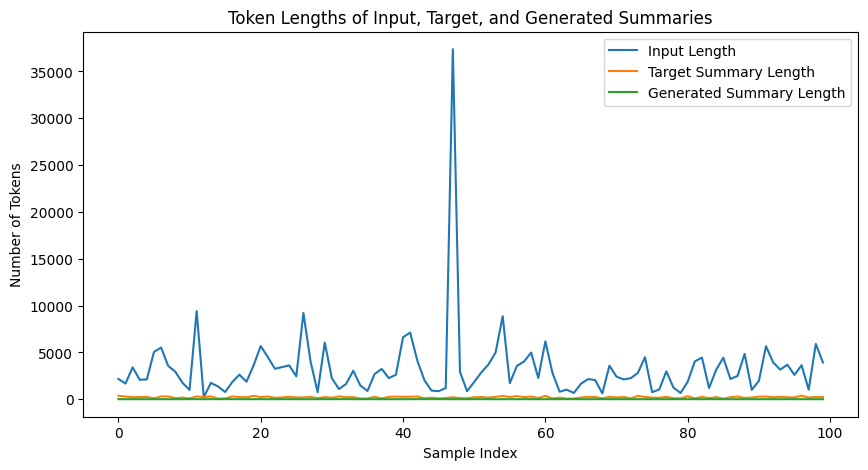

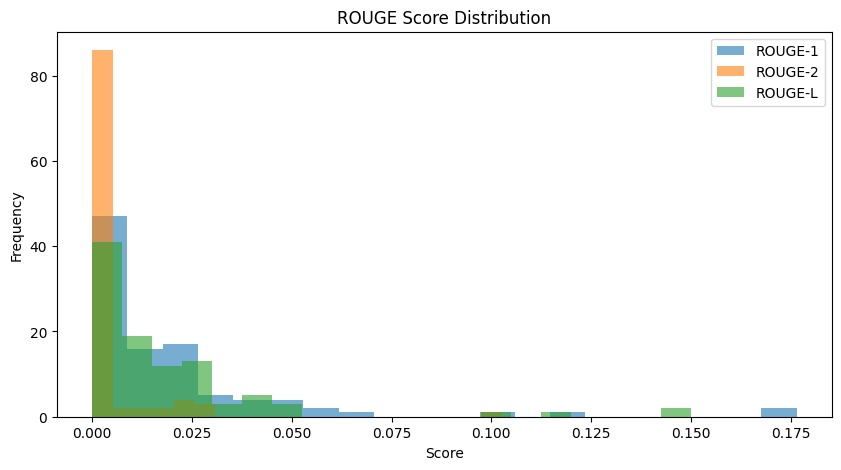

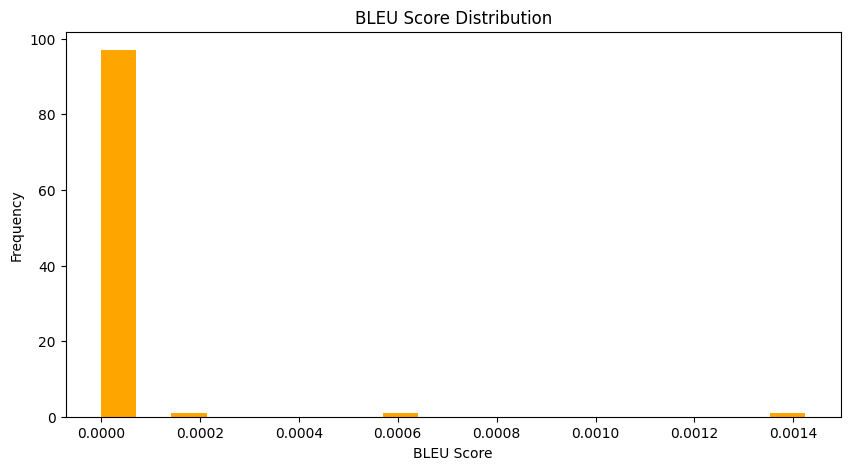

In [19]:
!pip install rouge-score nltk --quiet

import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np

# Set model to evaluation mode
model.eval()

# Evaluation sample size
eval_size = 100
sample_data = pubmed_data[-eval_size:]  # From test split

rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4

rouge_scores, bleu_scores = [], []
input_lengths, target_lengths, gen_lengths = [], [], []

print("Evaluating on", eval_size, "samples...\n")

for article, reference in sample_data:
    # Tokenize input
    input_ids = tokenizer.encode(article, return_tensors="pt", max_length=512, truncation=True).to(DEVICE)

    # Generate output
    with torch.no_grad():
        outputs = model(input_ids)
        pred_ids = torch.argmax(outputs, dim=-1)

    # Decode prediction
    prediction = tokenizer.decode(pred_ids[0], skip_special_tokens=True)

    # Record lengths
    input_lengths.append(len(article.split()))
    target_lengths.append(len(reference.split()))
    gen_lengths.append(len(prediction.split()))

    # ROUGE
    scores = rouge.score(reference, prediction)
    rouge_scores.append(scores)

    # BLEU
    bleu = sentence_bleu(
        [reference.split()],
        prediction.split(),
        smoothing_function=smoothie,
        weights=(0.5, 0.5)
    )
    bleu_scores.append(bleu)

    # Print one example
    if len(rouge_scores) == 1:
        print("🔹 ARTICLE:\n", article[:500], "\n")
        print("✅ REFERENCE SUMMARY:\n", reference, "\n")
        print("🧠 MODEL SUMMARY:\n", prediction, "\n")

# Average scores
avg_rouge1 = np.mean([s['rouge1'].fmeasure for s in rouge_scores])
avg_rouge2 = np.mean([s['rouge2'].fmeasure for s in rouge_scores])
avg_rougeL = np.mean([s['rougeL'].fmeasure for s in rouge_scores])
avg_bleu = np.mean(bleu_scores)

print("📊 Average ROUGE-1:", round(avg_rouge1, 4))
print("📊 Average ROUGE-2:", round(avg_rouge2, 4))
print("📊 Average ROUGE-L:", round(avg_rougeL, 4))
print("📊 Average BLEU:", round(avg_bleu, 4))

# =============================
# 🔽 PLOTTING
# =============================

# Lengths comparison
plt.figure(figsize=(10,5))
plt.plot(input_lengths, label="Input Length")
plt.plot(target_lengths, label="Target Summary Length")
plt.plot(gen_lengths, label="Generated Summary Length")
plt.title("Token Lengths of Input, Target, and Generated Summaries")
plt.xlabel("Sample Index")
plt.ylabel("Number of Tokens")
plt.legend()
plt.show()

# ROUGE score distribution
plt.figure(figsize=(10,5))
plt.hist([s['rouge1'].fmeasure for s in rouge_scores], bins=20, alpha=0.6, label="ROUGE-1")
plt.hist([s['rouge2'].fmeasure for s in rouge_scores], bins=20, alpha=0.6, label="ROUGE-2")
plt.hist([s['rougeL'].fmeasure for s in rouge_scores], bins=20, alpha=0.6, label="ROUGE-L")
plt.title("ROUGE Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# BLEU score distribution
plt.figure(figsize=(10,5))
plt.hist(bleu_scores, bins=20, color='orange')
plt.title("BLEU Score Distribution")
plt.xlabel("BLEU Score")
plt.ylabel("Frequency")
plt.show()
